In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from aif360.algorithms.preprocessing.reweighing import Reweighing
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score





pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [2]:
raw_data = pd.read_csv(r"C:\Users\HP\Desktop\Lab\project code\hr_Attrition.csv")

In [3]:
raw_data.shape

(701293, 35)

In [4]:
raw_data.columns=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [5]:
raw_data.head()

Age Attrition     BusinessTravel  DailyRate Department  DistanceFromHome  \
0   23       Yes  Travel_Frequently        125      Sales                28   
1   55       Yes  Travel_Frequently       1041      Sales                11   
2   21       Yes  Travel_Frequently       1147   Hardware                49   
3   27       Yes  Travel_Frequently        670      Sales                20   
4   40        No      Travel_Rarely       1052   Hardware                48   

   Education    EducationField  EmployeeCount  EmployeeNumber  ...  \
0          1     Life Sciences              1          849750  ...   
1          1         Marketing              1          828818  ...   
2          1   Human Resources              1          407506  ...   
3          3             Other              1          503493  ...   
4          1  Technical Degree              1          453899  ...   

   RelationshipSatisfaction StandardHours  StockOptionLevel  \
0                         2            80                 4   
1                         4            80                 4   
2                         1            80                 1   
3                         1            80                 3   
4                         3            80                 3   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 36                      2               1              28   
1                 11                      4               1              19   
2                 12                      1               1              10   
3                 33                      4               1               9   
4                 19                      6               4               1   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  1                       11                     1  
1                 19                       18                     2  
2                  7                       10                     2  
3                  7                        7                     3  
4                  1                        1                     2  

[5 rows x 35 columns]

## Data Preprocessing

print all column names as a list

In [6]:
print(raw_data.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


checking for null values

In [7]:
raw_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
raw_data.dropna(axis=0,inplace=True)

Return DataFrame with duplicate rows removed

In [9]:
data = raw_data.drop_duplicates()

In [10]:
data.describe()

Age      DailyRate  DistanceFromHome      Education  \
count  701293.000000  701293.000000     701293.000000  701293.000000   
mean       39.462276     797.795794         26.085820       2.943695   
std        12.137907     476.530710         14.028878       1.450507   
min        18.000000      11.000000          1.000000       1.000000   
25%        29.000000     445.000000         14.000000       2.000000   
50%        39.000000     798.000000         28.000000       3.000000   
75%        50.000000    1142.000000         38.000000       4.000000   
max        60.000000   13459.000000         50.000000       5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction     HourlyRate  \
count       701293.0    7.012930e+05            701293.000000  701293.000000   
mean             1.0    4.943122e+05                 2.291145     114.893741   
std              0.0    2.984216e+05                 1.129057      53.812843   
min              1.0    1.000000e+00                 1.000000       1.000000   
25%              1.0    2.301460e+05                 1.000000      72.000000   
50%              1.0    4.965350e+05                 2.000000     114.000000   
75%              1.0    7.484170e+05                 3.000000     158.000000   
max              1.0    9.913457e+06                 4.000000    1345.000000   

       JobInvolvement       JobLevel  ...  RelationshipSatisfaction  \
count   701293.000000  701293.000000  ...             701293.000000   
mean         1.837664       2.941594  ...                  2.188721   
std          1.043701       1.452344  ...                  1.105878   
min          1.000000       1.000000  ...                  1.000000   
25%          1.000000       2.000000  ...                  1.000000   
50%          1.000000       3.000000  ...                  2.000000   
75%          3.000000       4.000000  ...                  3.000000   
max          4.000000       5.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count       701293.0     701293.000000      701293.000000   
mean            80.0          2.427967          17.816356   
std              0.0          1.149390          11.422524   
min             80.0          0.000000           0.000000   
25%             80.0          1.000000           7.000000   
50%             80.0          2.000000          18.000000   
75%             80.0          4.000000          27.000000   
max             80.0          4.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count          701293.000000    701293.000000   701293.000000   
mean                3.451641         1.750441       10.573311   
std                 1.746824         1.047646        8.735939   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         1.000000        3.000000   
50%                 3.000000         1.000000        8.000000   
75%                 5.000000         2.000000       16.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count       701293.000000            701293.000000         701293.000000  
mean             5.854784                 5.821173              6.594600  
std              5.942620                 5.969399              7.095262  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 1.000000              2.000000  
50%              4.000000                 4.000000              4.000000  
75%              8.000000                 8.000000              8.000000  
max             40.000000                40.000000             50.000000  

[8 rows x 26 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701293 entries, 0 to 701292
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Age                       701293 non-null  int64 
 1   Attrition                 701293 non-null  object
 2   BusinessTravel            701293 non-null  object
 3   DailyRate                 701293 non-null  int64 
 4   Department                701293 non-null  object
 5   DistanceFromHome          701293 non-null  int64 
 6   Education                 701293 non-null  int64 
 7   EducationField            701293 non-null  object
 8   EmployeeCount             701293 non-null  int64 
 9   EmployeeNumber            701293 non-null  int64 
 10  EnvironmentSatisfaction   701293 non-null  int64 
 11  Gender                    701293 non-null  object
 12  HourlyRate                701293 non-null  int64 
 13  JobInvolvement            701293 non-null  int64 
 14  JobL

Here 26 are int type features and 9 are object type features.

### Investigate the categorical plots

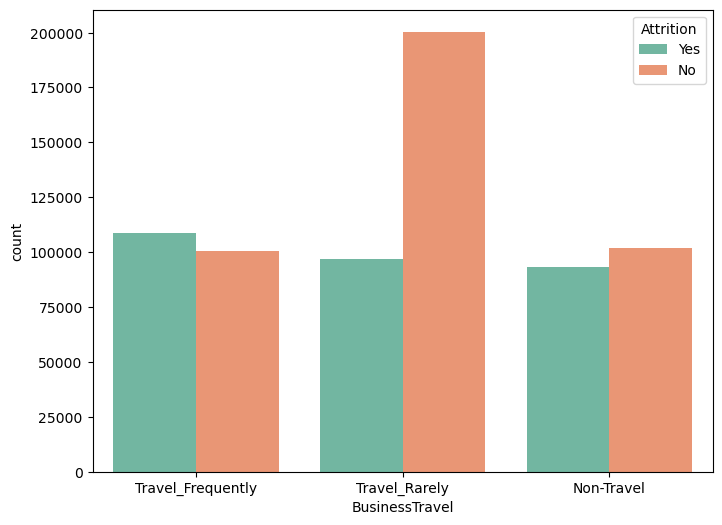

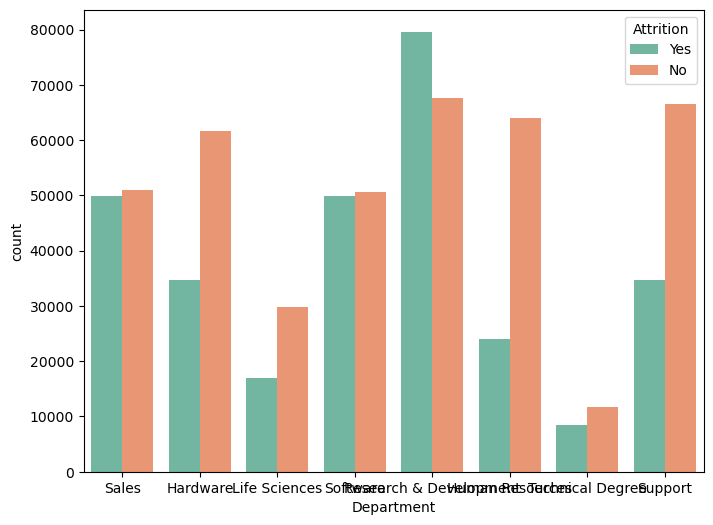

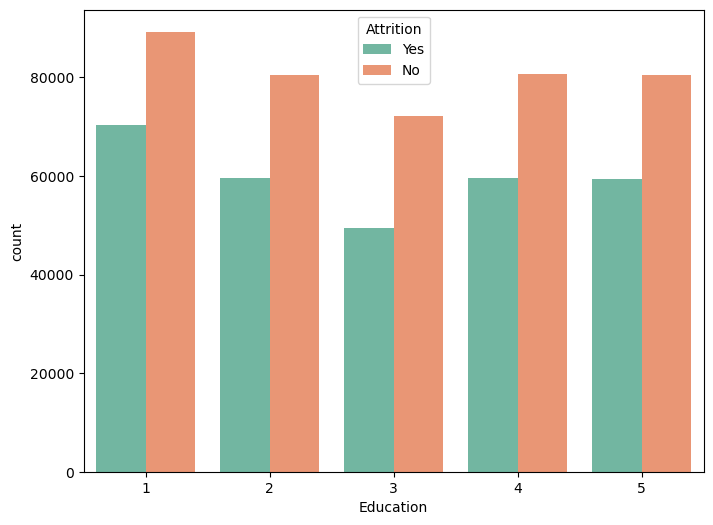

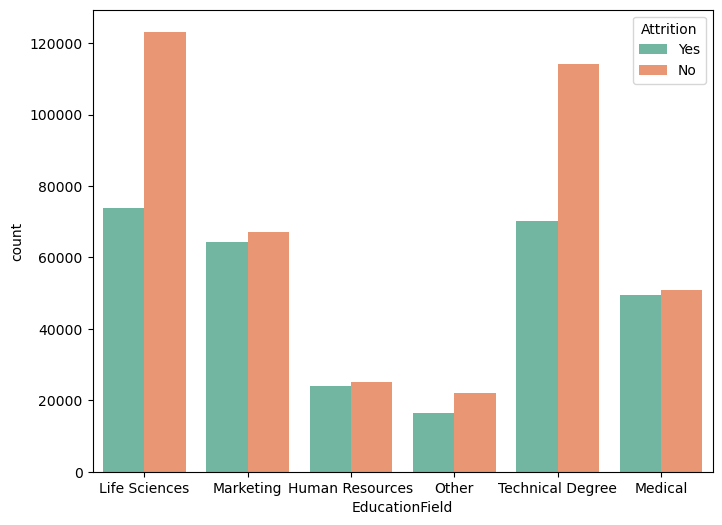

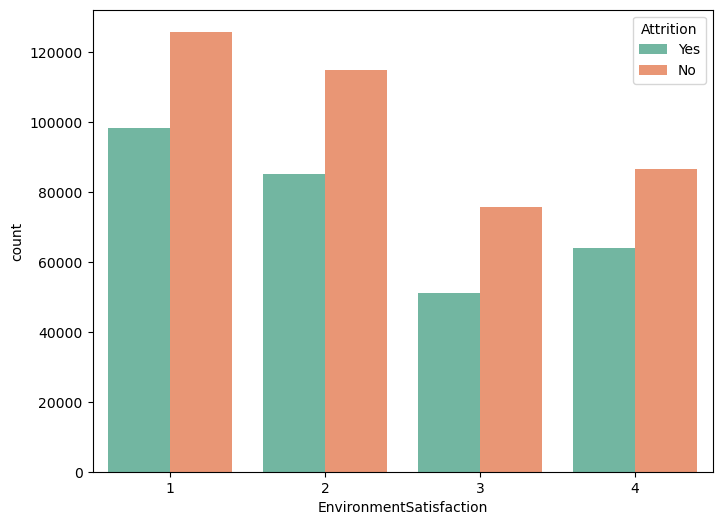

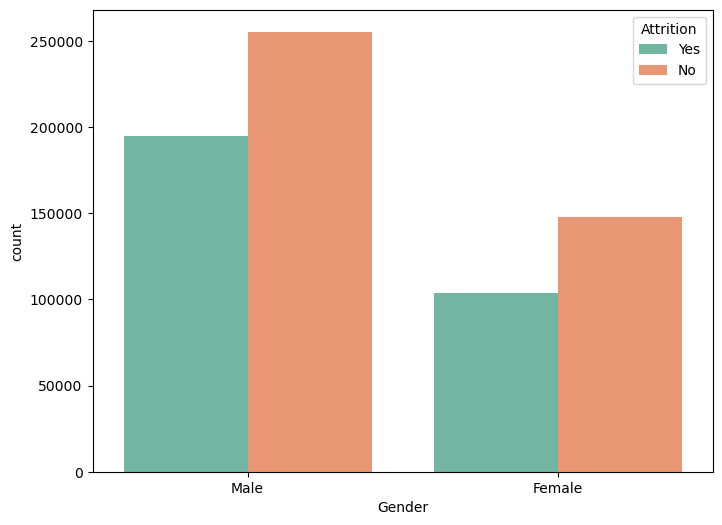

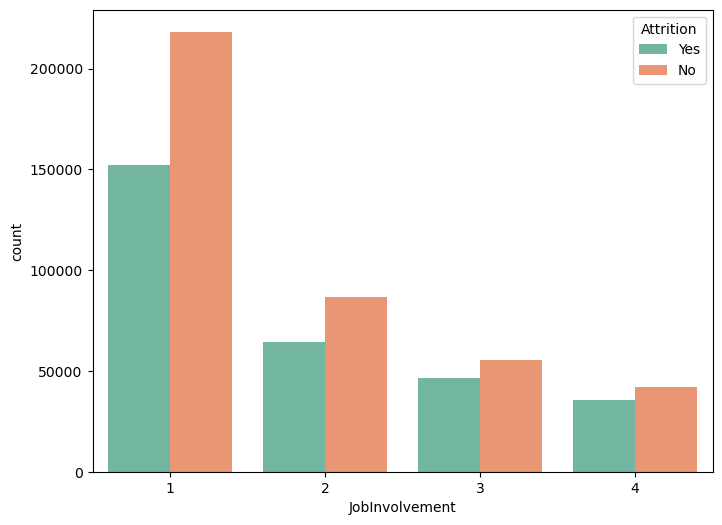

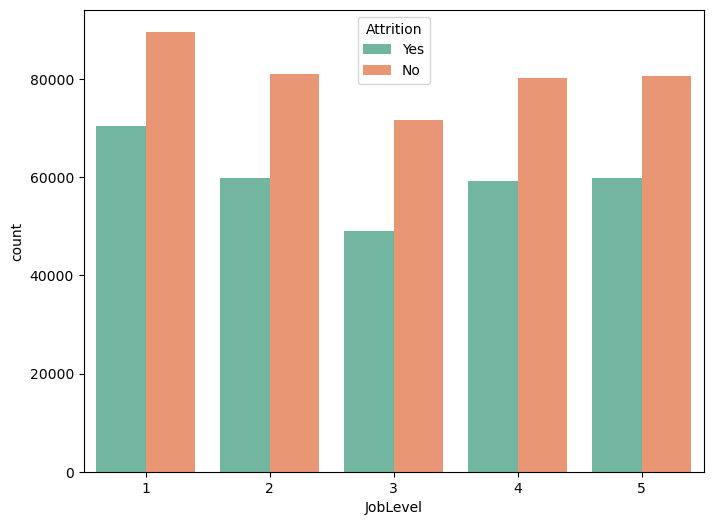

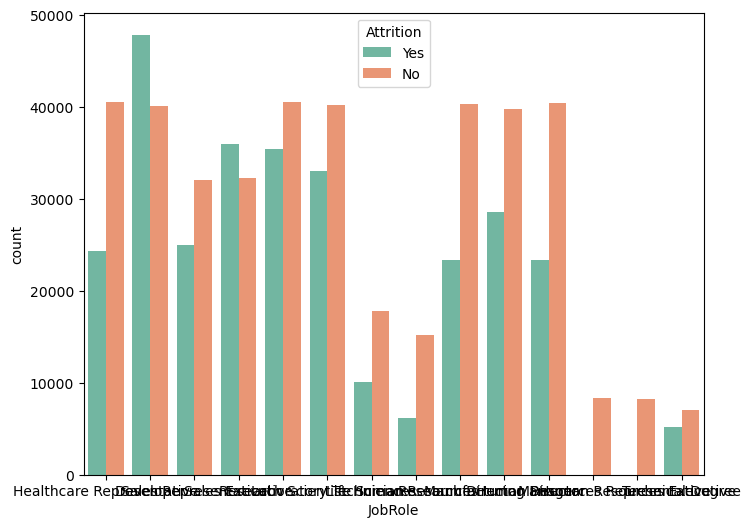

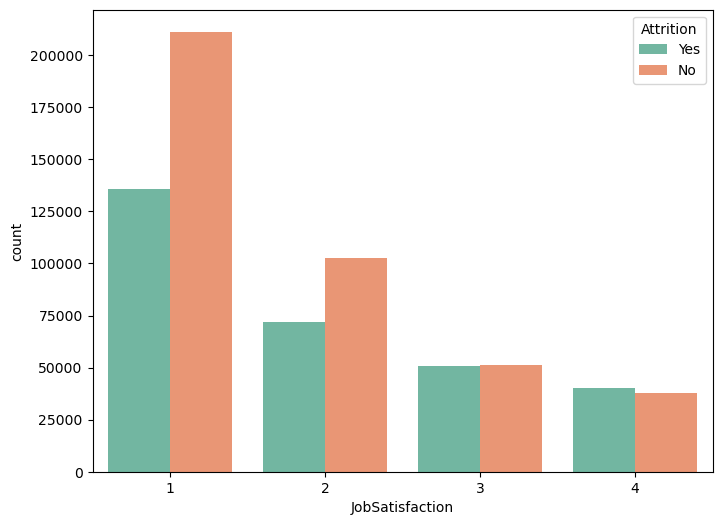

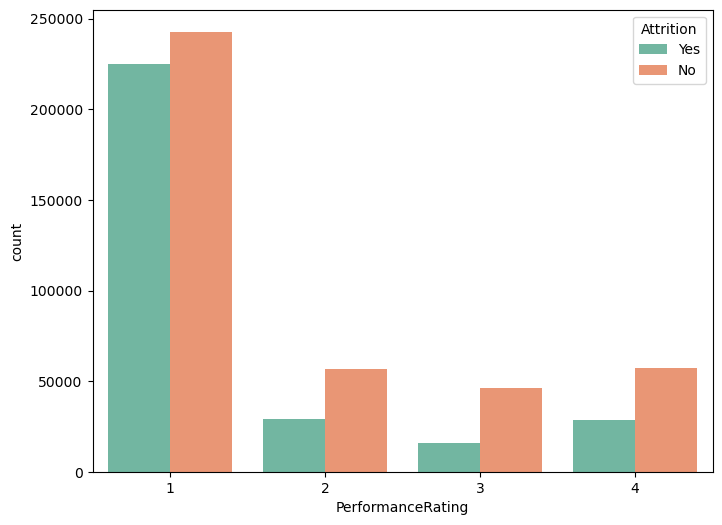

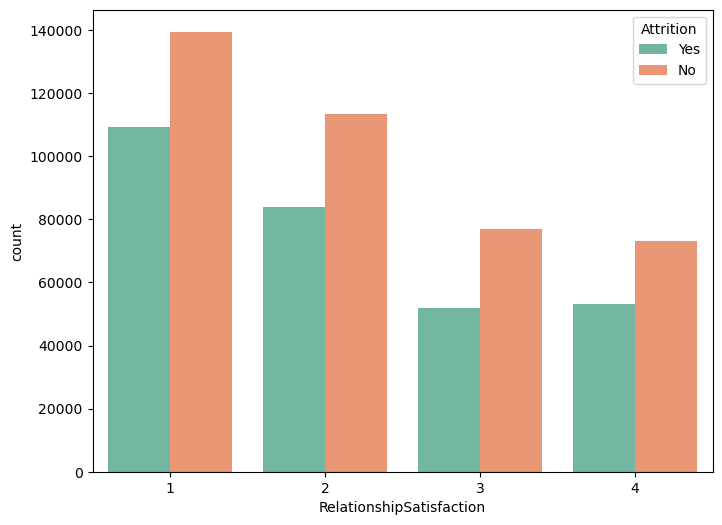

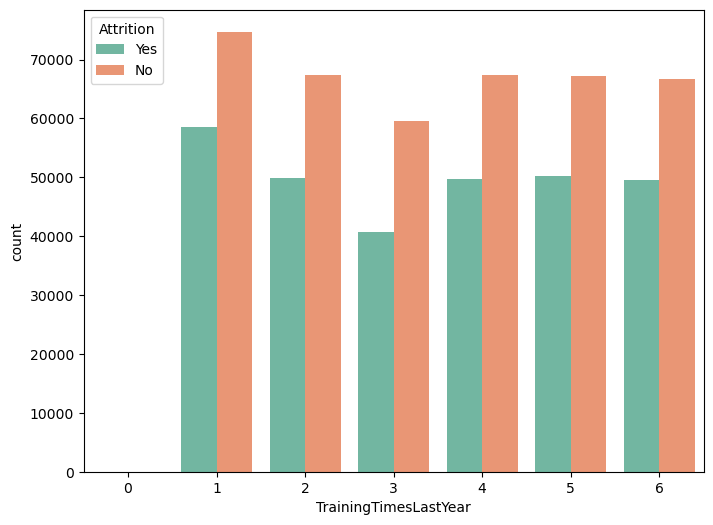

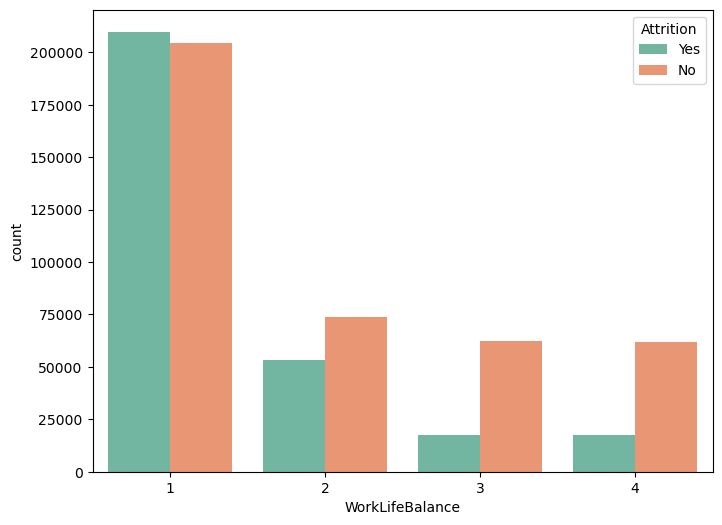

In [12]:
categorical_feature = ['BusinessTravel', 'Department','Education', 'EducationField',
                       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                        'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 
                        'RelationshipSatisfaction','TrainingTimesLastYear', 'WorkLifeBalance']

for category in categorical_feature:
    plt.figure(figsize = (8,6))
    sns.countplot(x = category, data = data,hue = 'Attrition',palette='Set2')

### Making numeric representation of categorical variables

In [13]:
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [14]:
data

Age  Attrition  BusinessTravel  DailyRate  Department  \
0         5          1               1        113           4   
1        37          1               1       1029           4   
2         3          1               1       1135           0   
3         9          1               1        658           4   
4        22          0               2       1040           0   
...     ...        ...             ...        ...         ...   
701288   37          0               2        641           1   
701289    4          1               2       1389           5   
701290   30          1               2        280           2   
701291   35          0               2       1428           1   
701292   11          1               2        571           4   

        DistanceFromHome  Education  EducationField  EmployeeCount  \
0                     27          0               1              0   
1                     10          0               2              0   
2                     48          0               0              0   
3                     19          2               4              0   
4                     47          0               5              0   
...                  ...        ...             ...            ...   
701288                 0          1               2              0   
701289                21          3               0              0   
701290                38          2               2              0   
701291                23          1               1              0   
701292                34          1               5              0   

        EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0               398177  ...                         1              0   
1               388783  ...                         3              0   
2               193574  ...                         0              0   
3               237429  ...                         0              0   
4               214938  ...                         2              0   
...                ...  ...                       ...            ...   
701288          164487  ...                         0              0   
701289          330383  ...                         0              0   
701290          429722  ...                         0              0   
701291          155905  ...                         3              0   
701292          338629  ...                         0              0   

        StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                      4                 36                      2   
1                      4                 11                      4   
2                      1                 12                      1   
3                      3                 33                      4   
4                      3                 19                      6   
...                  ...                ...                    ...   
701288                 1                  9                      4   
701289                 1                 14                      2   
701290                 3                 33                      3   
701291                 2                 19                      2   
701292                 1                  8                      4   

        WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                     0              28                   1   
1                     0              19                  19   
2                     0              10                   7   
3                     0               9                   7   
4                     3               1                   1   
...                 ...             ...                 ...   
701288                3               6                   1   
701289                1               9                   6   
701290                0               9                   6   
701291                2               3           

Investigate all the elements with each Feature

In [15]:
for column in data.columns:
    unique_vals = data[column].unique()
    length = len(unique_vals)
    
    if length < 18:
        print('The number of values for feature {}:{} ---> {}'.format(column,length,unique_vals))
    else:
        print('The number of values for feature {}:{}'.format(column,length))

The number of values for feature Age:43
The number of values for feature Attrition:2 ---> [1 0]
The number of values for feature BusinessTravel:3 ---> [1 2 0]
The number of values for feature DailyRate:1500
The number of values for feature Department:8 ---> [4 0 2 5 3 1 7 6]
The number of values for feature DistanceFromHome:50
The number of values for feature Education:5 ---> [0 2 4 3 1]
The number of values for feature EducationField:6 ---> [1 2 0 4 5 3]
The number of values for feature EmployeeCount:1 ---> [0]
The number of values for feature EmployeeNumber:467967
The number of values for feature EnvironmentSatisfaction:4 ---> [0 1 3 2]
The number of values for feature Gender:2 ---> [1 0]
The number of values for feature HourlyRate:192
The number of values for feature JobInvolvement:4 ---> [0 1 3 2]
The number of values for feature JobLevel:5 ---> [3 0 4 1 2]
The number of values for feature JobRole:14 ---> [ 1  0 12 11 10  5  6  2  9  8  7  4  3 13]
The number of values for feature 

In [16]:
data.shape

(701293, 35)

#### Dropping unnecesary columns

In [17]:
data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True,axis=1)

In [18]:
data.shape

(701293, 30)

In [19]:
data = data.drop_duplicates()

In [20]:
data.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0    5          1               1        113           4                27   
1   37          1               1       1029           4                10   
2    3          1               1       1135           0                48   
3    9          1               1        658           4                19   
4   22          0               2       1040           0                47   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          0               1                        0       1  ...   
1          0               2                        0       1  ...   
2          0               0                        1       0  ...   
3          2               4                        1       0  ...   
4          0               5                        3       0  ...   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 46                  0                         1   
1                 42                  0                         3   
2                 19                  0                         0   
3                 47                  0                         0   
4                 47                  0                         2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 36                      2                0              28   
1                 11                      4                0              19   
2                 12                      1                0              10   
3                 33                      4                0               9   
4                 19                      6                3               1   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   1                       11                     1  
1                  19                       18                     2  
2                   7                       10                     2  
3                   7                        7                     3  
4                   1                        1                     2  

[5 rows x 30 columns]

### Dropping Constant Feature using Varience Threshold Technique

The variance threshold is a simple baseline approach to feature selection.It removes all features which variance doesn't meet some threshold.By default,it removes all zero-variance features, i.e features that have the same values in all samples.
We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawback of filter methods.

In [21]:
var_thresh = VarianceThreshold() # by default the threshold = 0
var_thresh.fit(data)

VarianceThreshold()

In [22]:
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

here all features are necesary

In [23]:
print('All features: ',data.columns)

print('Features Selected: ',data.columns[var_thresh.get_support()])

All features:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Features Selected:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime'

The get_support returns a Boolean vector where True means that the variable does not have zero variance.

The following code drops the columns based on the variance threshold algorithm

In [24]:
selected_columns = data.columns[var_thresh.get_support()]

for cols in data.columns:
    if cols not in selected_columns:
        data.drop(columns = cols, inplace = True)

In [25]:
data

Age  Attrition  BusinessTravel  DailyRate  Department  \
0         5          1               1        113           4   
1        37          1               1       1029           4   
2         3          1               1       1135           0   
3         9          1               1        658           4   
4        22          0               2       1040           0   
...     ...        ...             ...        ...         ...   
701288   37          0               2        641           1   
701289    4          1               2       1389           5   
701290   30          1               2        280           2   
701291   35          0               2       1428           1   
701292   11          1               2        571           4   

        DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0                     27          0               1                        0   
1                     10          0               2                        0   
2                     48          0               0                        1   
3                     19          2               4                        1   
4                     47          0               5                        3   
...                  ...        ...             ...                      ...   
701288                 0          1               2                        0   
701289                21          3               0                        1   
701290                38          2               2                        1   
701291                23          1               1                        3   
701292                34          1               5                        0   

        Gender  ...  PercentSalaryHike  PerformanceRating  \
0            1  ...                 46                  0   
1            1  ...                 42                  0   
2            0  ...                 19                  0   
3            0  ...                 47                  0   
4            0  ...                 47                  0   
...        ...  ...                ...                ...   
701288       1  ...                 15                  1   
701289       0  ...                 16                  0   
701290       1  ...                 41                  0   
701291       0  ...                  8                  2   
701292       1  ...                  8                  3   

        RelationshipSatisfaction  TotalWorkingYears  TrainingTimesLastYear  \
0                              1                 36                      2   
1                              3                 11                      4   
2                              0                 12                      1   
3                              0                 33                      4   
4                              2                 19                      6   
...                          ...                ...                    ...   
701288                         0                  9                      4   
701289                         0                 14                      2   
701290                         0                 33                      3   
701291                         3                 19                      2   
701292                         0                  8                      4   

        WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                     0              28                   1   
1                     0              19                  19   
2                     0              10                   7   
3                     0               9                   7   
4                     3               1                   1   
...                 ...             ...                 ...   
701288                3               6                   1   
701289                1               9                   6   
701290                0      

In [26]:
data['Attrition'].value_counts()

0    402914
1    298375
Name: Attrition, dtype: int64

#### Separate independant(x) and dependant(y) features

In [27]:
x = data.drop(columns = 'Attrition')
y = data['Attrition']

In [28]:
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0    5               1        113           4                27          0   
1   37               1       1029           4                10          0   
2    3               1       1135           0                48          0   
3    9               1        658           4                19          2   
4   22               2       1040           0                47          0   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        0       1         168  ...   
1               2                        0       1          86  ...   
2               0                        1       0          13  ...   
3               4                        1       0         100  ...   
4               5                        3       0          58  ...   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 46                  0                         1   
1                 42                  0                         3   
2                 19                  0                         0   
3                 47                  0                         0   
4                 47                  0                         2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 36                      2                0              28   
1                 11                      4                0              19   
2                 12                      1                0              10   
3                 33                      4                0               9   
4                 19                      6                3               1   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   1                       11                     1  
1                  19                       18                     2  
2                   7                       10                     2  
3                   7                        7                     3  
4                   1                        1                     2  

[5 rows x 29 columns]

In [29]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Attrition, dtype: int32

### Train Test Split for finding correlation between features

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)

In [31]:
x_train.to_csv('demo.csv')

In [32]:
x_train.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
177486   22               1        197           3                31   
148333   12               0        479           2                20   
478911    3               2        452           3                31   
528962   34               2        397           1                46   
280642   29               2       1380           1                22   

        Education  EducationField  EnvironmentSatisfaction  Gender  \
177486          0               1                        1       1   
148333          0               1                        0       1   
478911          2               1                        3       1   
528962          0               1                        3       1   
280642          0               5                        2       1   

        HourlyRate  ...  PercentSalaryHike  PerformanceRating  \
177486         138  ...                  3                  0   
148333         120  ...                 33                  0   
478911          62  ...                 14                  0   
528962         120  ...                 30                  2   
280642          71  ...                 40                  3   

        RelationshipSatisfaction  TotalWorkingYears  TrainingTimesLastYear  \
177486                         2                  2                      2   
148333                         0                 29                      1   
478911                         2                  2                      2   
528962                         2                  8                      5   
280642                         3                 22                      1   

        WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
177486                0              23                   8   
148333                0              29                  27   
478911                1              18                   8   
528962                2               5                   3   
280642                3              16                   1   

        YearsSinceLastPromotion  YearsWithCurrManager  
177486                       18                     3  
148333                       19                     3  
478911                        7                     5  
528962                        4                     3  
280642                        6                     5  

[5 rows x 29 columns]

In [33]:
y_train.head()

177486    1
148333    0
478911    1
528962    0
280642    0
Name: Attrition, dtype: int32

In [34]:
x_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Feature Selection using Pearson's correlation

In [35]:
corr = x_train.corr()
corr

Age  BusinessTravel  DailyRate  Department  \
Age                       1.000000        0.166982   0.004978   -0.085471   
BusinessTravel            0.166982        1.000000   0.001998   -0.099907   
DailyRate                 0.004978        0.001998   1.000000   -0.001851   
Department               -0.085471       -0.099907  -0.001851    1.000000   
DistanceFromHome         -0.050278       -0.002872   0.000201   -0.003301   
Education                 0.003319        0.005013   0.001684    0.002061   
EducationField           -0.004593       -0.030541   0.000246    0.047348   
EnvironmentSatisfaction   0.019859        0.031833  -0.001737   -0.004106   
Gender                    0.009333        0.002468  -0.002218   -0.001403   
HourlyRate                0.005314        0.002206  -0.001996   -0.001183   
JobInvolvement            0.050732        0.110850   0.002301   -0.009038   
JobLevel                  0.004938        0.005401   0.001446    0.003101   
JobRole                  -0.041383       -0.063190   0.000848    0.067837   
JobSatisfaction          -0.130253       -0.096592   0.003709    0.099325   
MaritalStatus            -0.330250       -0.029759  -0.002326    0.035728   
MonthlyIncome             0.017343        0.007275   0.008822    0.002555   
MonthlyRate               0.009789        0.002151   0.005193    0.003810   
NumCompaniesWorked        0.000088        0.002089   0.002376    0.003011   
OverTime                 -0.000112        0.000533   0.000049    0.000489   
PercentSalaryHike         0.012528        0.007151   0.005093    0.003355   
PerformanceRating         0.160348        0.131154   0.002048   -0.013004   
RelationshipSatisfaction  0.023697        0.049693   0.000453   -0.003425   
TotalWorkingYears         0.140126        0.045780   0.011848    0.002694   
TrainingTimesLastYear     0.005151        0.007856   0.002015    0.002481   
WorkLifeBalance           0.152385        0.119093   0.005690   -0.000896   
YearsAtCompany            0.002164        0.001755   0.003872    0.000940   
YearsInCurrentRole       -0.003665        0.000819   0.001646    0.000233   
YearsSinceLastPromotion   0.000465        0.000685   0.001007    0.001008   
YearsWithCurrManager      0.038267        0.027045   0.001532   -0.022921   

                          DistanceFromHome  Education  EducationField  \
Age                              -0.050278   0.003319       -0.004593   
BusinessTravel                   -0.002872   0.005013       -0.030541   
DailyRate                         0.000201   0.001684        0.000246   
Department                       -0.003301   0.002061        0.047348   
DistanceFromHome                  1.000000   0.012641       -0.024138   
Education                         0.012641   1.000000       -0.001598   
EducationField                   -0.024138  -0.001598        1.000000   
EnvironmentSatisfaction           0.027444   0.009573        0.031549   
Gender                           -0.006715   0.000363        0.002838   
HourlyRate                        0.002607   0.001639       -0.001004   
JobInvolvement                    0.076330   0.022254        0.026065   
JobLevel                          0.014361   0.008702        0.001517   
JobRole                          -0.013417   0.000632        0.030173   
JobSatisfaction                   0.083391   0.032830        0.058668   
MaritalStatus                    -0.008444  -0.006418        0.037477   
MonthlyIncome                     0.007449   0.011133        0.004311   
MonthlyRate                       0.000534   0.004394        0.004978   
NumCompaniesWorked                0.008597   0.002895       -0.000188   
OverTime                          0.003181   0.001807        0.000669   
PercentSalaryHike                 0.012028   0.009940       -0.000444   
PerformanceRating                -0.068335  -0.014011        0.058362   
RelationshipSatisfaction          0.030134   0.007187        0.029995   
TotalWorkingYears                -0.09045

visualizing correlation using a heatmap

<AxesSubplot:>

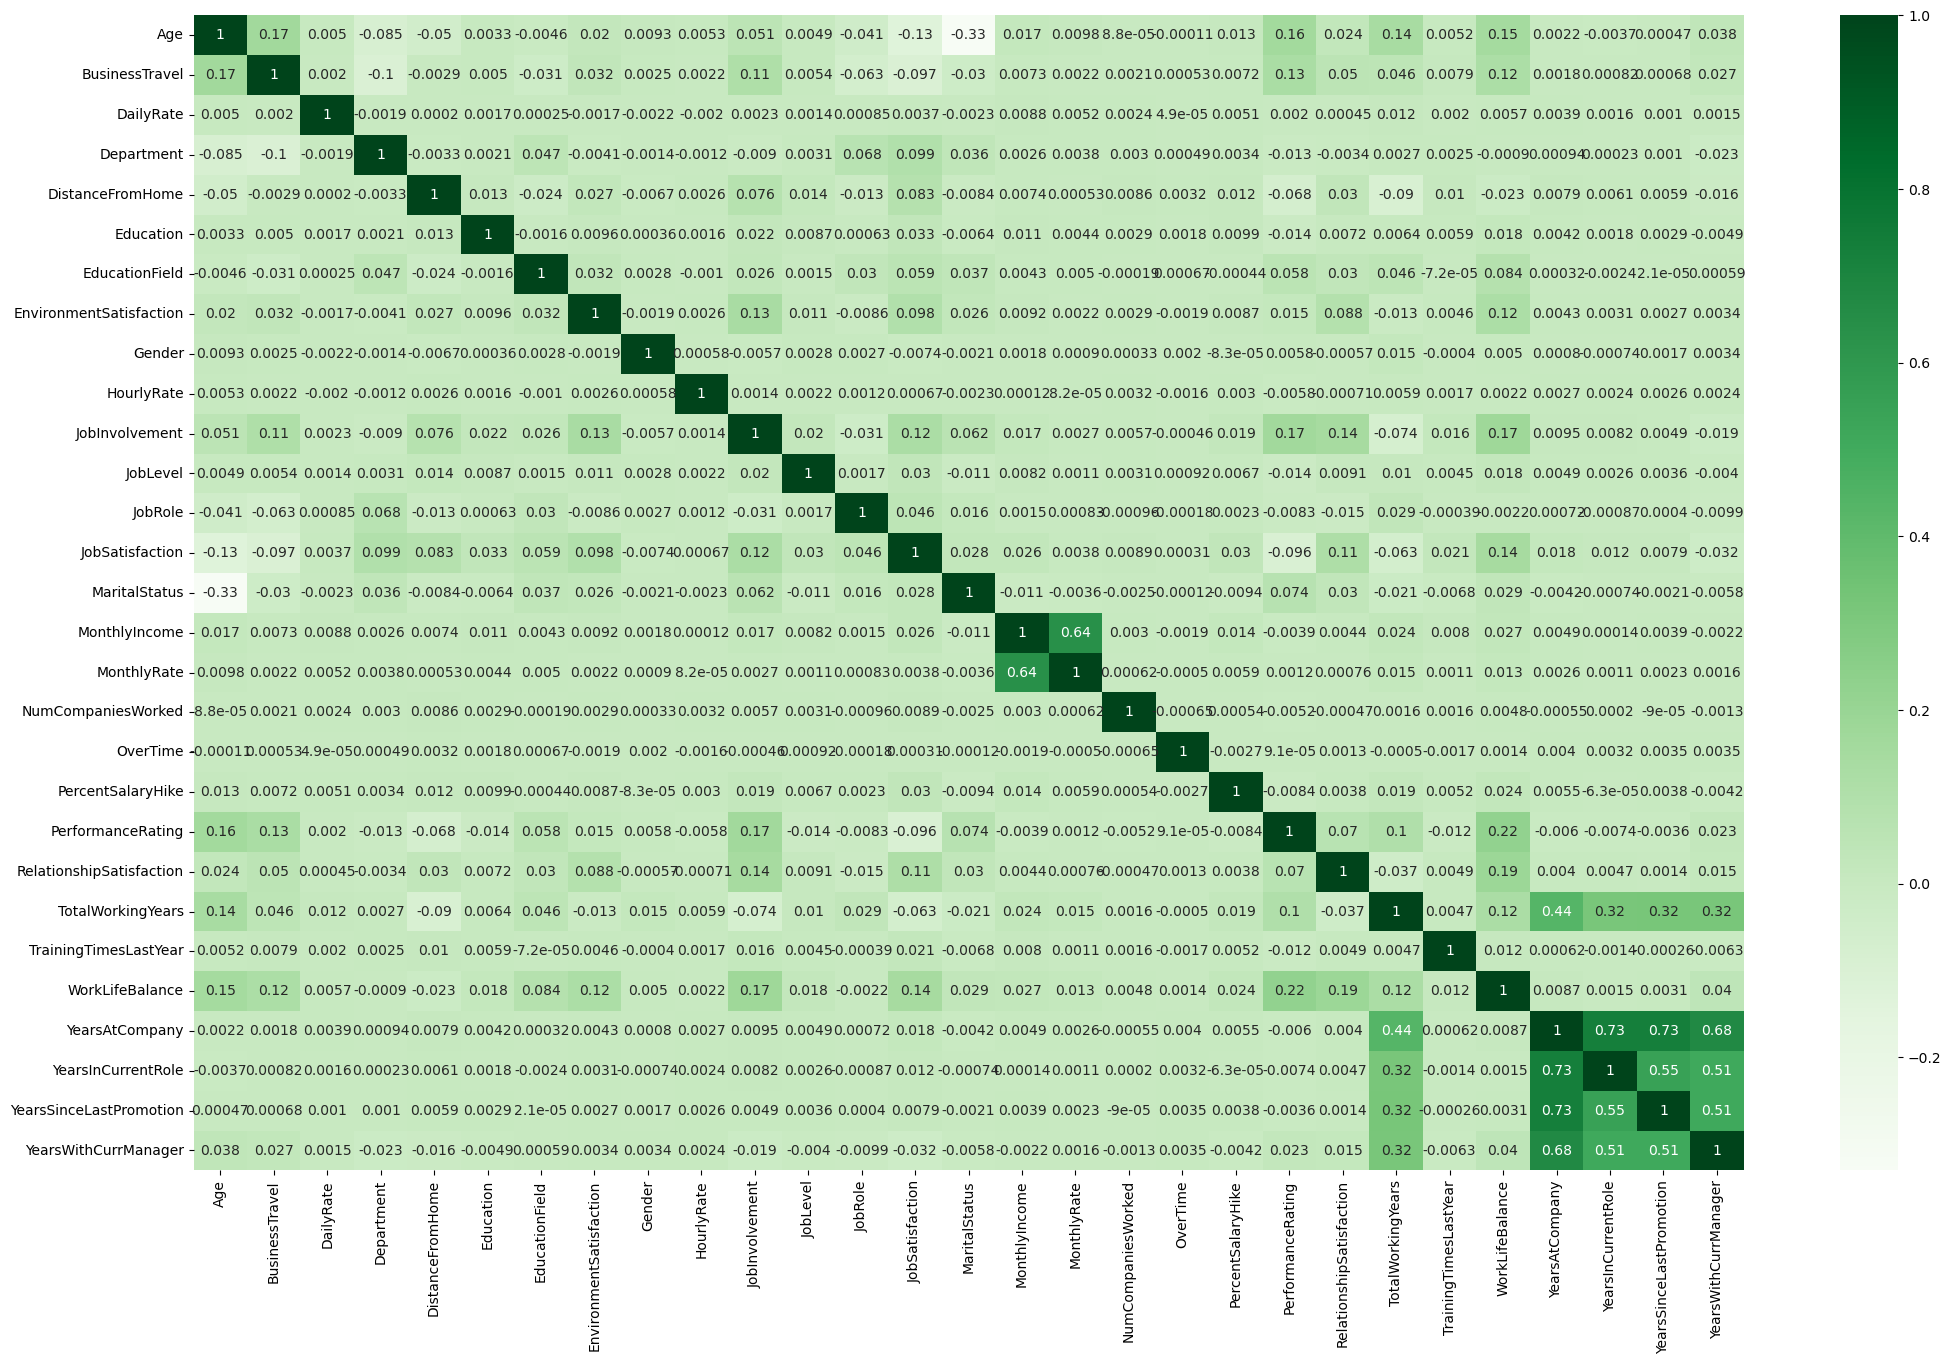

In [36]:
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, cmap = 'Greens')

Use of the mask

<AxesSubplot:>

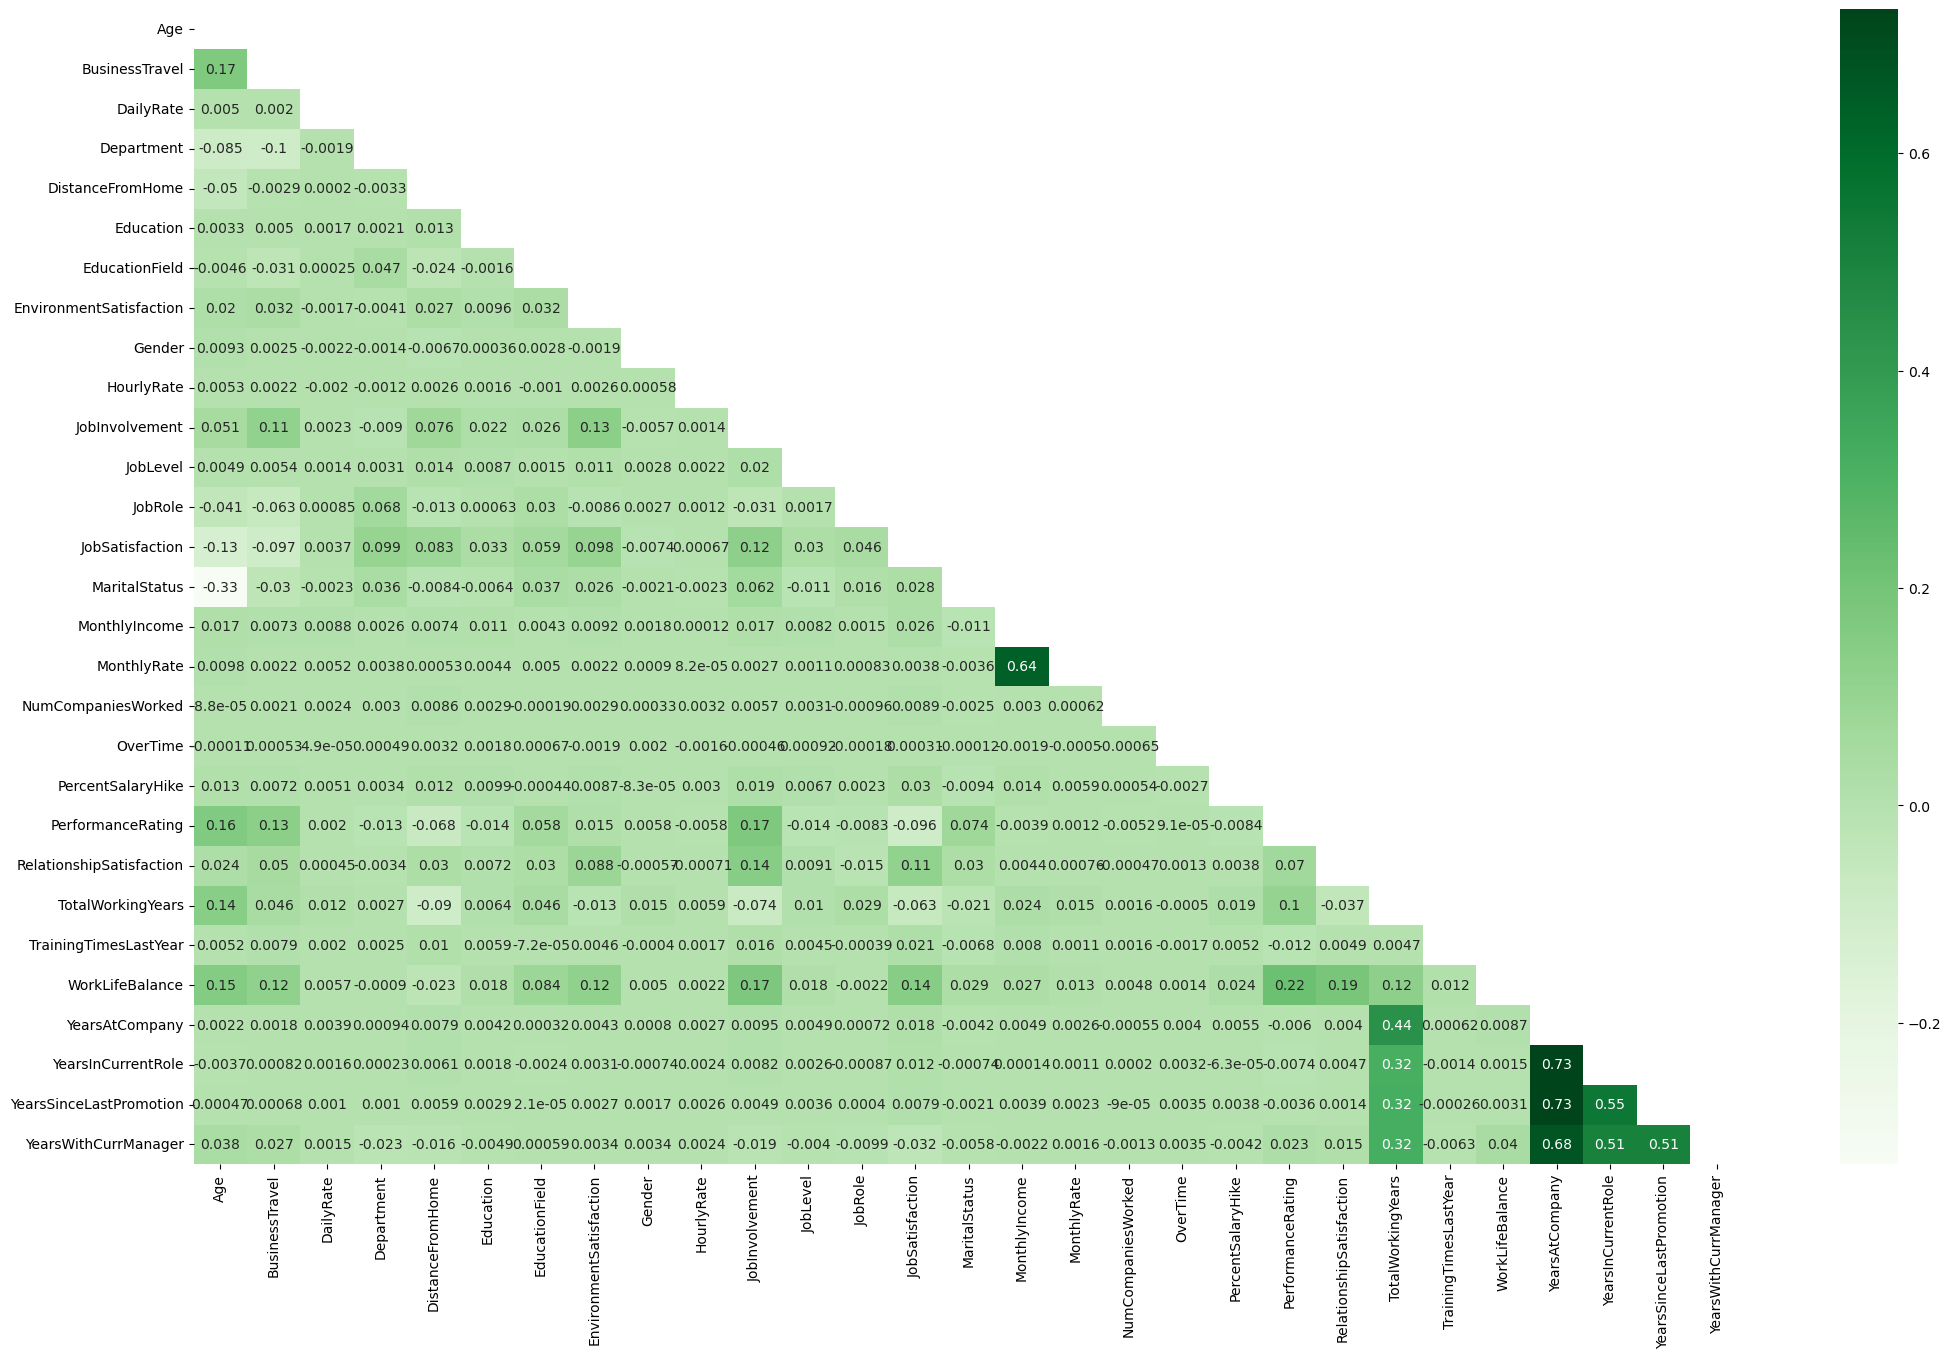

In [37]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, cmap = 'Greens', mask = mask1)

With the following function we can select highly correlated feature.
It will remove the first feature that is highly correlated with another feature.

In [38]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(x_train, 0.75) # 75% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [40]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
chi2_features = SelectKBest(chi2, k = 6) 
X_kbest_features = chi2_features.fit_transform(x, y)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,x.columns):
    if bool:
        new_feature.append(feature)
list3=new_feature
list3

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'WorkLifeBalance']

In [41]:
print(data.shape)
data.head()

(701289, 30)


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0    5          1               1        113           4                27   
1   37          1               1       1029           4                10   
2    3          1               1       1135           0                48   
3    9          1               1        658           4                19   
4   22          0               2       1040           0                47   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          0               1                        0       1  ...   
1          0               2                        0       1  ...   
2          0               0                        1       0  ...   
3          2               4                        1       0  ...   
4          0               5                        3       0  ...   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 46                  0                         1   
1                 42                  0                         3   
2                 19                  0                         0   
3                 47                  0                         0   
4                 47                  0                         2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 36                      2                0              28   
1                 11                      4                0              19   
2                 12                      1                0              10   
3                 33                      4                0               9   
4                 19                      6                3               1   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   1                       11                     1  
1                  19                       18                     2  
2                   7                       10                     2  
3                   7                        7                     3  
4                   1                        1                     2  

[5 rows x 30 columns]

#### Convert categorical features to seperate columns

In [42]:
for column in data.columns:
    unique_vals = data[column].unique()
    length = len(unique_vals)
    if length < 18:
        print("The number of values for feature {}: {} ---> {}".format(column, length, unique_vals))
    else:
        print("The number of values for feature {}: {}".format(column, length))

The number of values for feature Age: 43
The number of values for feature Attrition: 2 ---> [1 0]
The number of values for feature BusinessTravel: 3 ---> [1 2 0]
The number of values for feature DailyRate: 1500
The number of values for feature Department: 8 ---> [4 0 2 5 3 1 7 6]
The number of values for feature DistanceFromHome: 50
The number of values for feature Education: 5 ---> [0 2 4 3 1]
The number of values for feature EducationField: 6 ---> [1 2 0 4 5 3]
The number of values for feature EnvironmentSatisfaction: 4 ---> [0 1 3 2]
The number of values for feature Gender: 2 ---> [1 0]
The number of values for feature HourlyRate: 192
The number of values for feature JobInvolvement: 4 ---> [0 1 3 2]
The number of values for feature JobLevel: 5 ---> [3 0 4 1 2]
The number of values for feature JobRole: 14 ---> [ 1  0 12 11 10  5  6  2  9  8  7  4  3 13]
The number of values for feature JobSatisfaction: 4 ---> [1 0 3 2]
The number of values for feature MaritalStatus: 4 ---> [2 1 0 3]


In [43]:
new_raw_data = pd.get_dummies(data,columns = ['BusinessTravel', 'Department',
       'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance'])
print(new_raw_data.shape)

(701289, 99)


In [44]:
list(new_raw_data.columns)

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_0',
 'BusinessTravel_1',
 'BusinessTravel_2',
 'Department_0',
 'Department_1',
 'Department_2',
 'Department_3',
 'Department_4',
 'Department_5',
 'Department_6',
 'Department_7',
 'Education_0',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'EducationField_0',
 'EducationField_1',
 'EducationField_2',
 'EducationField_3',
 'EducationField_4',
 'EducationField_5',
 'EnvironmentSatisfaction_0',
 'EnvironmentSatisfaction_1',
 'EnvironmentSatisfaction_2',
 'EnvironmentSatisfaction_3',
 'Gender_0',
 'Gender_1',
 'JobInvolvement_0',
 'JobInvolvement_1',
 'JobInvolvement_2',
 'JobInvolvement_3',
 'JobRole_0',
 'JobRole_1',
 'JobRole_2',
 'JobRole_3',
 'JobRole_4',
 'JobRole_5',
 'JobRole_6',
 'JobRole

#### Train test split for classification

In [45]:
x = new_raw_data.drop(columns = 'Attrition')
y = new_raw_data['Attrition']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1,stratify=y)

In [47]:
x_train.to_csv('test.csv')

We need to scale correctly (we will use MinMax scaler to do this)

In [48]:
cols_to_scale = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike',
               'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
 'YearsSinceLastPromotion']

scaler = MinMaxScaler()
scaler.fit(x_train[cols_to_scale])
x_train[cols_to_scale] = scaler.transform(x_train[cols_to_scale])
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

In [49]:
x_train.head()

Age  DailyRate  DistanceFromHome  HourlyRate  JobLevel  \
177486  0.523810   0.131421          0.632653    0.722513         2   
148333  0.285714   0.319546          0.408163    0.628272         3   
478911  0.071429   0.301534          0.632653    0.324607         1   
528962  0.809524   0.264843          0.938776    0.628272         4   
280642  0.690476   0.920614          0.448980    0.371728         4   

        MonthlyIncome  MonthlyRate  PercentSalaryHike  TotalWorkingYears  \
177486       0.341961     0.003984           0.061224              0.050   
148333       0.268146     0.468948           0.673469              0.725   
478911       0.509793     0.361473           0.285714              0.050   
528962       0.848735     0.155033           0.612245              0.200   
280642       0.543641     0.378736           0.816327              0.550   

        YearsAtCompany  ...  TrainingTimesLastYear_1  TrainingTimesLastYear_2  \
177486           0.575  ...                        0                        1   
148333           0.725  ...                        1                        0   
478911           0.450  ...                        0                        1   
528962           0.125  ...                        0                        0   
280642           0.400  ...                        1                        0   

        TrainingTimesLastYear_3  TrainingTimesLastYear_4  \
177486                        0                        0   
148333                        0                        0   
478911                        0                        0   
528962                        0                        0   
280642                        0                        0   

        TrainingTimesLastYear_5  TrainingTimesLastYear_6  WorkLifeBalance_0  \
177486                        0                        0                  1   
148333                        0                        0                  1   
478911                        0                        0                  0   
528962                        1                        0                  0   
280642                        0                        0                  0   

        WorkLifeBalance_1  WorkLifeBalance_2  WorkLifeBalance_3  
177486                  0                  0                  0  
148333                  0                  0                  0  
478911                  1                  0                  0  
528962                  0                  1                  0  
280642                  0                  0                  1  

[5 rows x 98 columns]

In [50]:
x_test.head()

Age  DailyRate  DistanceFromHome  HourlyRate  JobLevel  \
402497  0.857143   0.370247          0.183673    0.115183         0   
208663  0.380952   0.606404          0.530612    0.753927         0   
493027  0.261905   0.831888          0.897959    0.921466         1   
476209  0.380952   0.555037          0.244898    0.356021         4   
166776  0.214286   0.960640          0.938776    0.047120         1   

        MonthlyIncome  MonthlyRate  PercentSalaryHike  TotalWorkingYears  \
402497       0.428509     0.394342           0.693878              0.075   
208663       0.724087     0.561125           0.653061              0.825   
493027       0.184081     0.303687           0.551020              0.050   
476209       0.312502     0.407871           0.734694              0.675   
166776       0.242223     0.329439           0.000000              0.250   

        YearsAtCompany  ...  TrainingTimesLastYear_1  TrainingTimesLastYear_2  \
402497           0.075  ...                        0                        1   
208663           0.050  ...                        0                        0   
493027           0.200  ...                        0                        0   
476209           0.300  ...                        1                        0   
166776           0.175  ...                        0                        1   

        TrainingTimesLastYear_3  TrainingTimesLastYear_4  \
402497                        0                        0   
208663                        0                        1   
493027                        0                        0   
476209                        0                        0   
166776                        0                        0   

        TrainingTimesLastYear_5  TrainingTimesLastYear_6  WorkLifeBalance_0  \
402497                        0                        0                  1   
208663                        0                        0                  1   
493027                        1                        0                  0   
476209                        0                        0                  1   
166776                        0                        0                  1   

        WorkLifeBalance_1  WorkLifeBalance_2  WorkLifeBalance_3  
402497                  0                  0                  0  
208663                  0                  0                  0  
493027                  1                  0                  0  
476209                  0                  0                  0  
166776                  0                  0                  0  

[5 rows x 98 columns]

# Classification Algorithms

#### Decision Tree

In [51]:
# prepronning
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
treemodel = DecisionTreeClassifier()
cv = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [54]:
cv.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, Fi

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'best'}

In [56]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

In [57]:
clf = tree.DecisionTreeClassifier(random_state=0,max_depth = 5,criterion='entropy')
clf = clf.fit(x, y)

[Text(0.51875, 0.9166666666666666, 'X[0] <= 23.5\nentropy = 0.984\nsamples = 701289\nvalue = [402914, 298375]'),
 Text(0.26666666666666666, 0.75, 'X[2] <= 28.5\nentropy = 0.987\nsamples = 388388\nvalue = [167873, 220515]'),
 Text(0.13333333333333333, 0.5833333333333334, 'X[94] <= 0.5\nentropy = 0.961\nsamples = 185175\nvalue = [114112, 71063]'),
 Text(0.06666666666666667, 0.4166666666666667, 'X[79] <= 0.5\nentropy = 0.84\nsamples = 67514\nvalue = [49375, 18139]'),
 Text(0.03333333333333333, 0.25, 'X[0] <= 22.5\nentropy = 0.975\nsamples = 30231\nvalue = [17898, 12333]'),
 Text(0.016666666666666666, 0.08333333333333333, 'entropy = 0.981\nsamples = 28116\nvalue = [16348, 11768]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.837\nsamples = 2115\nvalue = [1550, 565]'),
 Text(0.1, 0.25, 'X[63] <= 0.5\nentropy = 0.624\nsamples = 37283\nvalue = [31477, 5806]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.68\nsamples = 31727\nvalue = [26014, 5713]'),
 Text(0.11666666666666667

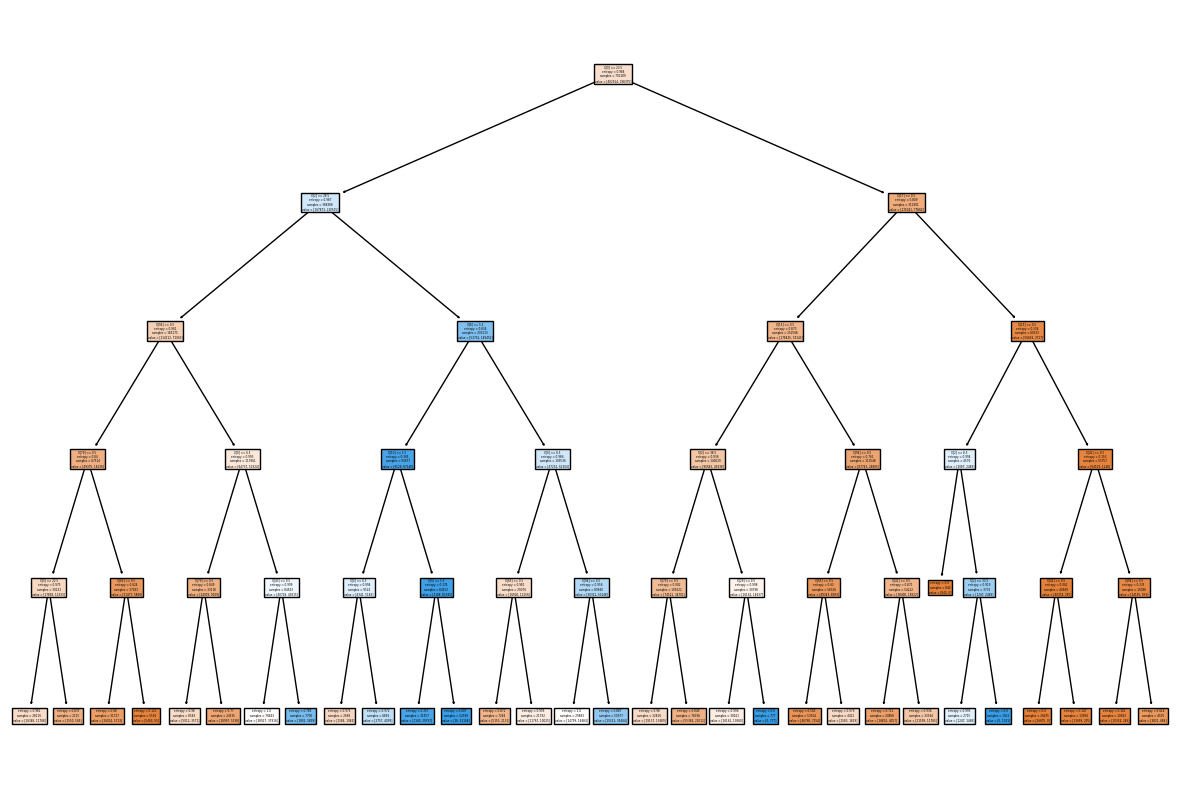

In [58]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [59]:
print(tree.export_text(clf))

|--- feature_0 <= 23.50
|   |--- feature_2 <= 28.50
|   |   |--- feature_94 <= 0.50
|   |   |   |--- feature_79 <= 0.50
|   |   |   |   |--- feature_0 <= 22.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  22.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_79 >  0.50
|   |   |   |   |--- feature_63 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_63 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_94 >  0.50
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- feature_79 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_79 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- feature_43 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_43 >  0.50
|   |   |   |   |   |--- class: 1
|   |--- feature_2 >  28.50
|   |   |--- feature_8 <= 5.50
|   |   |   |--- feature_10 <= 1.50
|   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   

In [60]:
y_predict = clf.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score,classification_report

In [62]:
score = accuracy_score(y_predict,y_test)
print(score)

0.5745340729227566


In [63]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73    140258
           1       0.00      0.00      0.00         0

    accuracy                           0.57    140258
   macro avg       0.50      0.29      0.36    140258
weighted avg       1.00      0.57      0.73    140258



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.tree import plot_tree

In [65]:
print(clf.feature_importances_)

[0.32384489 0.         0.21135117 0.         0.         0.
 0.         0.         0.14494393 0.01539494 0.05368492 0.
 0.         0.         0.         0.05823189 0.         0.06703505
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00453262
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01121493
 0.00243723 0.00845681 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00533803 0.         0.00986273
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03320474 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05046612 0.
 0.         0.        ]


In [66]:
df = pd.DataFrame({'Feature_names':x.columns,'Importance':clf.feature_importances_})

In [67]:
df

Feature_names  Importance
0                       Age    0.323845
1                 DailyRate    0.000000
2          DistanceFromHome    0.211351
3                HourlyRate    0.000000
4                  JobLevel    0.000000
..                      ...         ...
93  TrainingTimesLastYear_6    0.000000
94        WorkLifeBalance_0    0.050466
95        WorkLifeBalance_1    0.000000
96        WorkLifeBalance_2    0.000000
97        WorkLifeBalance_3    0.000000

[98 rows x 2 columns]

In [68]:
df_1 = df.sort_values(by = 'Importance',ascending=False)

In [69]:
df_1

Feature_names  Importance
0                 Age    0.323845
2    DistanceFromHome    0.211351
8   TotalWorkingYears    0.144944
17       Department_1    0.067035
15   BusinessTravel_2    0.058232
..                ...         ...
34   EducationField_5    0.000000
33   EducationField_4    0.000000
32   EducationField_3    0.000000
31   EducationField_2    0.000000
97  WorkLifeBalance_3    0.000000

[98 rows x 2 columns]

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
#model_tree = RandomForestClassifier(n_estimators = 20,max_depth=5)
 #model_tree.fit(x_train, y_train)
#pred = model_tree.predict(x_test)


### XGBoost

In [79]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [80]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
Model=XGBClassifier() 
Model.fit(x_train, y_train)
pred = Model.predict(x_test)

print("Accuracy Score: ",accuracy_score(pred,y_test))
print("Confusion Matrix:",confusion_matrix(pred,y_test))
print("Classification Report: ",classification_report(pred,y_test))

Accuracy Score:  0.7703802991629711
Confusion Matrix: [[70017 21640]
 [10566 38035]]
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.76      0.81     91657
           1       0.64      0.78      0.70     48601

    accuracy                           0.77    140258
   macro avg       0.75      0.77      0.76    140258
weighted avg       0.79      0.77      0.77    140258



In [81]:
Model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [82]:
import pickle


# Load your data and create X and y variables
# ...

# Train your model



# with open("Model.pickle", "wb") as f:
#     pickle.dump(Model, f)

#.close()


In [83]:
pickle.dump(Model,open('cdac_project.pkl','wb'))

## Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print("Accuracy Score: ",accuracy_score(pred,y_test))
print("Confusion Matrix:",confusion_matrix(pred,y_test))
print("Classification Report: ",classification_report(pred,y_test))

## GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

gradient_booster.fit(x_train,y_train)

y_pred=gradient_booster.predict(x_test)

print("Accuracy Score: ",accuracy_score(y_pred,y_test))
print("Confusion Matrix:",confusion_matrix(y_pred,y_test))

print(classification_report(y_test,gradient_booster.predict(x_test)))

final_roc_auc = []

probas1 = clf.predict_proba(x_test)[:, 1]
probas2 = model_tree.predict_proba(x_test)[:, 1]
probas3 = Model.predict_proba(x_test)[:, 1]
probas4 = model.predict_proba(x_test)[:, 1]
probas6 =gradient_booster.predict_proba(x_test)[:, 1]

In [1]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)

NameError: name 'roc_curve' is not defined

In [ ]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Random Forest Classifier', roc_auc_score(y_test, probas2))
print('roc_auc_score for XGboost: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for Logistic regression: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Gradient Boosting classifier: ', roc_auc_score(y_test, probas6))

In [ ]:
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': ' XGboost', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'Logistic regression', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Gradient Boosting classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})


In [ ]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

import pickle

file = open ('final_project_picklefile.pkl','wb')
pickle.dump(model,file)
file.close()